## Support Vector Classifier


This notebook contains an excerpt of the chapter In-Depth: Support Vector Machines from the book the Python Data Science Handbook by Jake VanderPlas. An amazing book wich explains the theorical concepts behind SVM as well as provide the coding scripts.

### Linear kernel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats  ##scipy: Scientific Computer In Python. Collecting numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics, and much more.
import seaborn as sns

In [2]:
from sklearn.datasets.samples_generator import make_blobs  #Generate isotropic Gaussian blobs for clustering.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
X,Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6) #X store d1, d2 and Y is a dummy related with the cluster

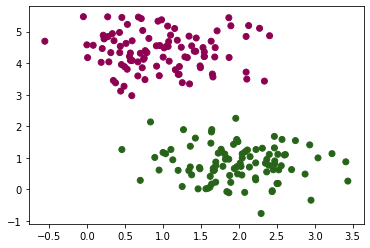

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap="PiYG")
plt.show()

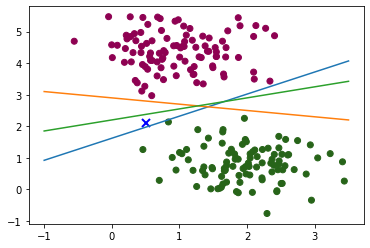

In [5]:
xx=np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c=Y, cmap="PiYG")
plt.plot([0.5],[2.1],'x',color='blue', markeredgewidth=2, markersize=8)


for a, b in [(0.7,1.62), (-0.2, 2.9), (0.35,2.2)]:
    yy=a*xx+b
    plt.plot(xx, yy )

* Margin maximization

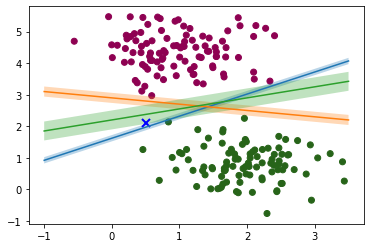

In [6]:
xx=np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c=Y, cmap="PiYG")
plt.plot([0.5],[2.1],'x',color='blue', markeredgewidth=2, markersize=8)


for a, b,d in [(0.7,1.62,0.1), (-0.2, 2.9, 0.16), (0.35,2.2, 0.3)]:
    yy=a*xx+b
    plt.plot(xx, yy)
    plt.fill_between(xx, yy-d, yy+d, alpha=0.3)
    

## Model creation

In [7]:
from sklearn.svm import SVC

In [8]:
model=SVC(kernel='linear', C=100)
model.fit(X,Y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
def plt_svc (model, ax=None, plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    xx=np.linspace(xlim[0], xlim[1],30)
    yy=np.linspace(ylim[0], ylim[1],30)
    Y,X=np.meshgrid(yy,xx)
    
    
    xy =np.vstack([X.ravel(), Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    
    
    ax.contour(X,Y,P, colors='k', levels=[-1,0,1], linestyles=['--', '-' , '--'])
    
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=60, linewidth=1, cmap="PiYG")
                   

[[0.59009904 2.96974544]
 [2.33812285 3.43116792]
 [0.83685684 2.13635938]]


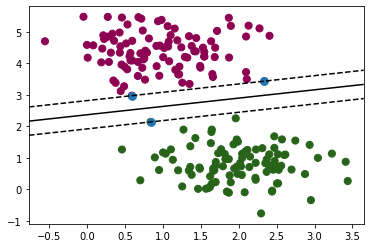

In [10]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="PiYG")
plt_svc(model, plot_support=True)

In [11]:
def plot_svm(N=10, ax=None):
    X,Y=make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X= X[:N]
    Y= Y[:N]
    model=SVC(kernel='linear', C=1000)
    model.fit(X,Y)
    
    ax= ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="PiYG")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)

[[0.44359863 3.11530945]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


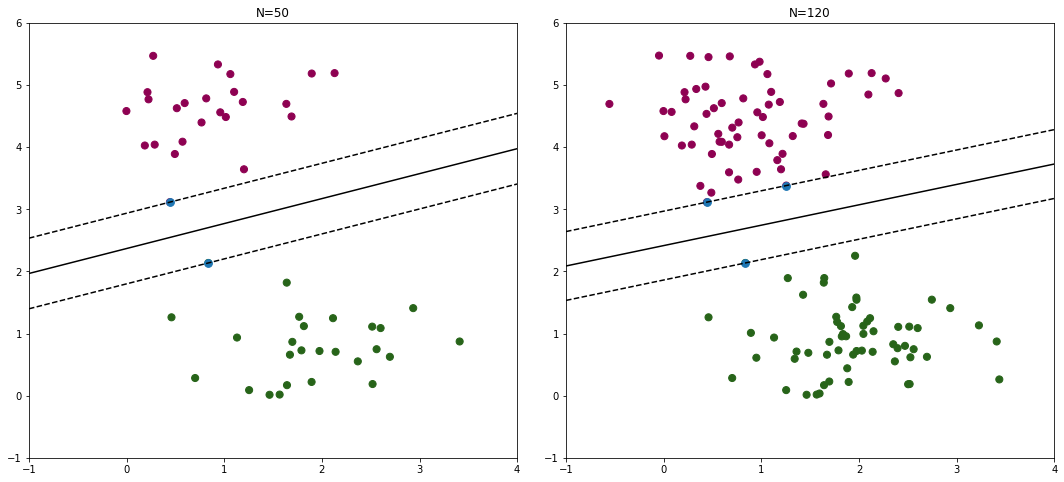

In [12]:
fig, ax= plt.subplots(1,2, figsize=(16,8))
fig.subplots_adjust(left=0.06, right=0.95, wspace=0.1)
for ax_i, N, in zip(ax, [50, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title('N={0}'.format(N)) ##Dont change the support vector even when the sample is different

In [13]:
from ipywidgets import interact, fixed

In [14]:
interact(plot_svm, N=[50, 100, 120], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(50, 100, 120), value=50), Output()), _dom_classes=('w…

<function __main__.plot_svm(N=10, ax=None)>